# Power Quality Classification using Muti Layer Perceptron (Dataset 2)

This notebook focusses on developing a Multi Layer perceptron which classifies a particular power signal into its respective power quality condition. The dataset used here contains signals which belong to one of the 6 classes(power quality condition). The sampling rate of this data is 256. This means that each signal is characterized by 256 data points. Here the signals provided are in time domain.

In [204]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [205]:
#loading the dataset using pandas
x_train = pd.read_csv("../Dataset2/Train/Voltage_L1_train.csv")
y_train = pd.read_csv("../Dataset2/Train/output_train.csv")
x_test = pd.read_csv("../Dataset2/Test/Voltage_L1_test.csv")
y_test = pd.read_csv("../Dataset2/Test/output_test.csv")

In [206]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (5999, 256)
y_train (5999, 1)
x_test (3599, 256)
y_test (3599, 1)


## Data Preprocessing

This segment of notebook contains all the preprocessing steps which are performed on the data.

### Data cleaning

In [207]:
#dropna() function is used to remove all those rows which contains NA values
x_train.dropna(axis=0,inplace=True)
y_train.dropna(axis=0,inplace=True)
x_test.dropna(axis=0,inplace=True)
y_test.dropna(axis=0,inplace=True)

In [208]:
#shape of the data frame after dropping the rows containing NA values
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (5999, 256)
y_train (5999, 1)
x_test (3599, 256)
y_test (3599, 1)


In [209]:
#here we are constructing the array which will finally contain the column names
header =[]
for i in range(1,x_train.shape[1]+1):
    header.append("Col"+str(i))

In [210]:
#assigning the column name array to the respectinve dataframes
x_train.columns = header
x_test.columns = header

In [211]:
#assigning the column name array to the respectinve dataframes
header = ["output"]
y_train.columns = header
y_test.columns = header

In [212]:
x_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col247,Col248,Col249,Col250,Col251,Col252,Col253,Col254,Col255,Col256
0,573.652486,1003.343736,1588.404525,2317.576741,2804.364311,3225.322510,3662.821690,4174.627969,4656.244143,4939.070130,...,-4650.282434,-4228.581226,-3865.609932,-3395.654756,-2933.680470,-2322.450904,-1841.562453,-1282.042025,-601.968217,-156.848367
1,4757.365183,5264.598912,5428.642486,5650.413073,5939.710012,5911.948067,6147.642171,6076.921501,5958.797444,6053.817701,...,-280.360872,323.325836,861.103019,1415.929276,2007.692919,2561.130303,2960.282598,3619.932691,4008.288701,4422.229911
2,4242.144824,4644.679402,5013.356532,5229.417051,5534.898007,5797.190678,5930.658682,5960.014599,6055.336310,6103.707793,...,-1256.270585,-616.527428,-67.068193,549.016676,1099.652199,1697.572166,2239.961604,2776.876479,3248.638662,3807.665149
3,2077.819247,2561.679246,3085.653813,3545.905160,4023.421592,4496.705157,4809.079868,5186.298840,5453.627533,5737.354699,...,-3557.345152,-3017.951179,-2596.647329,-1996.266675,-1467.203661,-885.101101,-329.685256,304.222722,935.528504,1460.127297
4,3599.645319,4099.944762,4499.282469,4897.875855,5120.077118,5402.227743,5694.801362,5928.683099,5981.616502,6052.006904,...,-2020.240712,-1388.704968,-849.731284,-232.632694,341.406093,854.579135,1528.023058,2002.557438,2576.468343,3036.303600


In [213]:
x_test.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col247,Col248,Col249,Col250,Col251,Col252,Col253,Col254,Col255,Col256
0,4216.164293,4550.919227,4885.253969,5265.577080,5634.058181,5690.878844,5984.805444,6083.124480,6024.018340,6144.339029,...,-1279.720481,-672.204610,-35.247405,565.001817,1139.580709,1623.258946,2159.189259,2729.066018,3292.437301,3770.985050
1,795.638794,1340.736614,1928.805243,2465.916079,3009.942949,3475.153730,3938.568022,4372.781654,4765.603003,5090.817748,...,-4525.083123,-4077.498908,-3630.262875,-3176.648183,-2652.563485,-2135.982927,-1549.968773,-970.063115,-413.973048,202.507328
2,1220.943267,1770.550513,2318.816674,2850.186275,3357.786987,3848.017230,4274.339651,4669.175893,5027.840955,5329.856655,...,-4214.790563,-3762.024055,-3303.182589,-2802.950592,-2246.516780,-1712.153266,-1120.729328,-553.276475,43.863168,614.870963
3,1013.772210,1621.783618,2178.146635,2733.460484,3178.151416,3692.797702,4177.895304,4539.640464,4948.873847,5271.862849,...,-4371.401183,-3937.075334,-3502.317297,-2922.179500,-2467.320667,-1904.033355,-1362.385474,-704.032900,-188.518269,466.064827
4,4490.355896,4862.601717,5235.681699,5401.432840,5741.255908,5840.507807,6030.352157,6037.480783,6109.355580,6000.190091,...,-848.410798,-279.507713,269.777288,853.806015,1410.187144,1977.999116,2621.735468,3069.781180,3624.993700,4116.325633


In [214]:
y_train.head()

,output
0,1
1,1
2,1
3,1
4,1


In [215]:
y_test.head()

,output
0,1
1,1
2,1
3,1
4,1


In [216]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [217]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_val',x_val.shape)
print('y_val',y_val.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (4799, 256)
y_train (4799, 1)
x_val (1200, 256)
y_val (1200, 1)
x_test (3599, 256)
y_test (3599, 1)


In [218]:
y_train_hot = pd.get_dummies(y_train['output'])
y_test_hot = pd.get_dummies(y_test['output'])
y_val_hot = pd.get_dummies(y_val['output'])

In [219]:
y_train_hot.head()

,1,2,3,4,5,6
5627,0,0,0,0,0,1
1755,0,1,0,0,0,0
2344,0,0,1,0,0,0
4283,0,0,0,0,1,0
3034,0,0,0,1,0,0


In [220]:
y_train_arr = y_train_hot.to_numpy()
y_test_arr = y_test_hot.to_numpy()
y_val_arr = y_val_hot.to_numpy()
print("y_train:",y_train_arr.shape)
print("y_test:",y_test_arr.shape)
print("y_val:",y_val_arr.shape)
no_of_classes = y_train_arr.shape[1]
#print(no_of_classes)

y_train: (4799, 6)
y_test: (3599, 6)
y_val: (1200, 6)


In [221]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()
for i in range(0,x_train.shape[0]):
    x_train[i][:] = fft(x_train[i][:])
    
for i in range(0,x_test.shape[0]):
    x_test[i][:] = fft(x_test[i][:])

for i in range(0,x_val.shape[0]):
    x_val[i][:] = fft(x_val[i][:])

<ipython-input-221-8af77d55593a>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  x_train[i][:] = fft(x_train[i][:])
<ipython-input-221-8af77d55593a>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  x_test[i][:] = fft(x_test[i][:])
<ipython-input-221-8af77d55593a>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x_val[i][:] = fft(x_val[i][:])


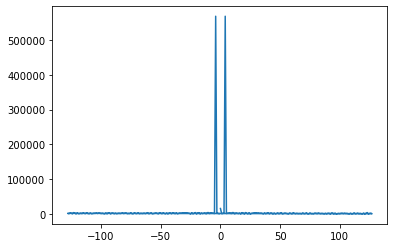

In [222]:
yf = x_train[1101][0:256]
xf = fftfreq(256,1/256)
plt.plot(xf, np.abs(yf))
plt.show()

In [223]:
transform = StandardScaler()
x_train_tr = transform.fit_transform(x_train)
x_test_tr = transform.fit_transform(x_test)
x_val_tr = transform.fit_transform(x_val)

In [224]:
print("Training",x_train_tr.shape)
print(y_train_arr.shape)
print("Validation",x_val_tr.shape)
print(y_val_arr.shape)
print("Test",x_test_tr.shape)
print(y_test_arr.shape)
sampling_rate = x_train_tr.shape[1]

Training (4799, 256)
(4799, 6)
Validation (1200, 256)
(1200, 6)
Test (3599, 256)
(3599, 6)


In [225]:
def model_training(no_of_classes,sampling_rate):
    model = Sequential()

    model.add(Dense(64, input_shape=(sampling_rate,), activation = 'relu'))

    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.6))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.6))

    #model.add(Dense(16, activation = 'relu'))
    

    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(no_of_classes, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return(model)

In [226]:
model = model_training(no_of_classes,sampling_rate)
history = model.fit(x_train_tr, y_train_arr, batch_size=64, epochs=30, validation_data=(x_val_tr, y_val_arr))


Epoch 1/30
75/75 [==============================] - 0s 3ms/step - loss: 2.1466 - accuracy: 0.1716 - val_loss: 1.6259 - val_accuracy: 0.3933
Epoch 2/30
75/75 [==============================] - 0s 2ms/step - loss: 1.7140 - accuracy: 0.2584 - val_loss: 1.4874 - val_accuracy: 0.5900
Epoch 3/30
75/75 [==============================] - 0s 2ms/step - loss: 1.6024 - accuracy: 0.3260 - val_loss: 1.3008 - val_accuracy: 0.6908
Epoch 4/30
75/75 [==============================] - 0s 2ms/step - loss: 1.4290 - accuracy: 0.3950 - val_loss: 1.0774 - val_accuracy: 0.7600
Epoch 5/30
75/75 [==============================] - 0s 2ms/step - loss: 1.3242 - accuracy: 0.4689 - val_loss: 0.9008 - val_accuracy: 0.7992
Epoch 6/30
75/75 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.5140 - val_loss: 0.7391 - val_accuracy: 0.8550
Epoch 7/30
75/75 [==============================] - 0s 2ms/step - loss: 1.0699 - accuracy: 0.5638 - val_loss: 0.6254 - val_accuracy: 0.8858
Epoch 8/30
75/75 [==

In [227]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_63 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 6)                 102       
Total params: 19,158
Trainable params: 19,158
Non-trainable params: 0
_________________________________________________

In [228]:
pred_acc = model.evaluate(x_test_tr,y_test_arr)
print("Test accuracy is {}".format(pred_acc))

113/113 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9555
Test accuracy is [0.16786745190620422, 0.9555432200431824]


In [229]:
model.save("model1.h5")